In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
path = '/Users/laurituominen/Documents/Research/Reettis/neuromaps/'

# get data for plotting 
corrs_turku = dict(np.load(path + 'data/corrs_turku_schaefer.npz'))
nulls_turku = dict(np.load(path + 'data/nulls_turku_schaefer.npz'))

In [10]:
change_x_labels = np.load(path + '/data/rename_xlabels.npy', allow_pickle='TRUE').item()
change_x_labels['norgaard2021_flumazenil'] = '$GABA_A$'
del change_x_labels['dukart2018_flumazenil']

{'jaworska2020_fallypride': 'D2',
 'kaller2017_sch23390': 'D1',
 'radnakrishnan2018_gsk215083': '5-HT6',
 'beliveau2017_cimbi36': '5-HT2A',
 'savli2012_way100635': '5-HT1A',
 'beliveau2017_az10419369': '5-HT1B',
 'beliveau2017_sb207145': '5-HT4',
 'fazio2016_madam': '5-HTT',
 'tuominen_feobv': 'vAChT',
 'hillmer2016_flubatine': '$\\alpha4 \\beta2*$',
 'naganawa2020_lsn3172176': 'M1',
 'margulies2016_fcgradient01': 'Functional Gradient',
 'mueller2013_intersubjvar': 'Intersubject Variance',
 'hcps1200_megalpha': 'Alpha Power',
 'hcps1200_megdelta': 'Delta Power',
 'hcps1200_megbeta': 'Beta Power',
 'hcps1200_meggamma1': 'Low Gamma Power',
 'hcps1200_meggamma2': 'High Gamma Power',
 'hcps1200_megtheta': 'Theta Power',
 'hcps1200_megtimescale': 'Intrinsic Timescale',
 'finnema2016_ucbj': 'Synaptic Vesicles',
 'hcps1200_thickness': 'Cortical Thickness',
 'hcps1200_myelinmap': 'T1/T2',
 'dubois2015_abp688': 'mGluR5',
 'laurikainen2018_fmpepd2': 'Cannabinoid 1',
 'kantonen2020_carfentanil': 

In [11]:
subgroups = {'dopamine': ( 'kaller2017_sch23390','jaworska2020_fallypride'),  
             'serotonin': ('fazio2016_madam', 'savli2012_way100635','beliveau2017_az10419369', 
                           'beliveau2017_cimbi36', 'beliveau2017_sb207145', 'radnakrishnan2018_gsk215083'), 
            'acetylcholine': ('tuominen_feobv', 'hillmer2016_flubatine', 'naganawa2020_lsn3172176'),
            'function': ('margulies2016_fcgradient01', 'mueller2013_intersubjvar'),
             'neurophysiology': ('hcps1200_megalpha','hcps1200_megbeta', 'hcps1200_megdelta', 
                            'hcps1200_meggamma1', 'hcps1200_meggamma2',
                            'hcps1200_megtheta', 'hcps1200_megtimescale'),
             'structural': ('finnema2016_ucbj', 'hcps1200_thickness', 'hcps1200_myelinmap'),
             'various': ('norgaard2021_flumazenil', 'dubois2015_abp688',
                         'laurikainen2018_fmpepd2', 'kantonen2020_carfentanil',
                        'gallezot2017_gsk189254'),
             'metabolic' : ('raichle_cbf', 'raichle_cbv', 'raichle_cmr02', 'raichle_cmruglu')
            }

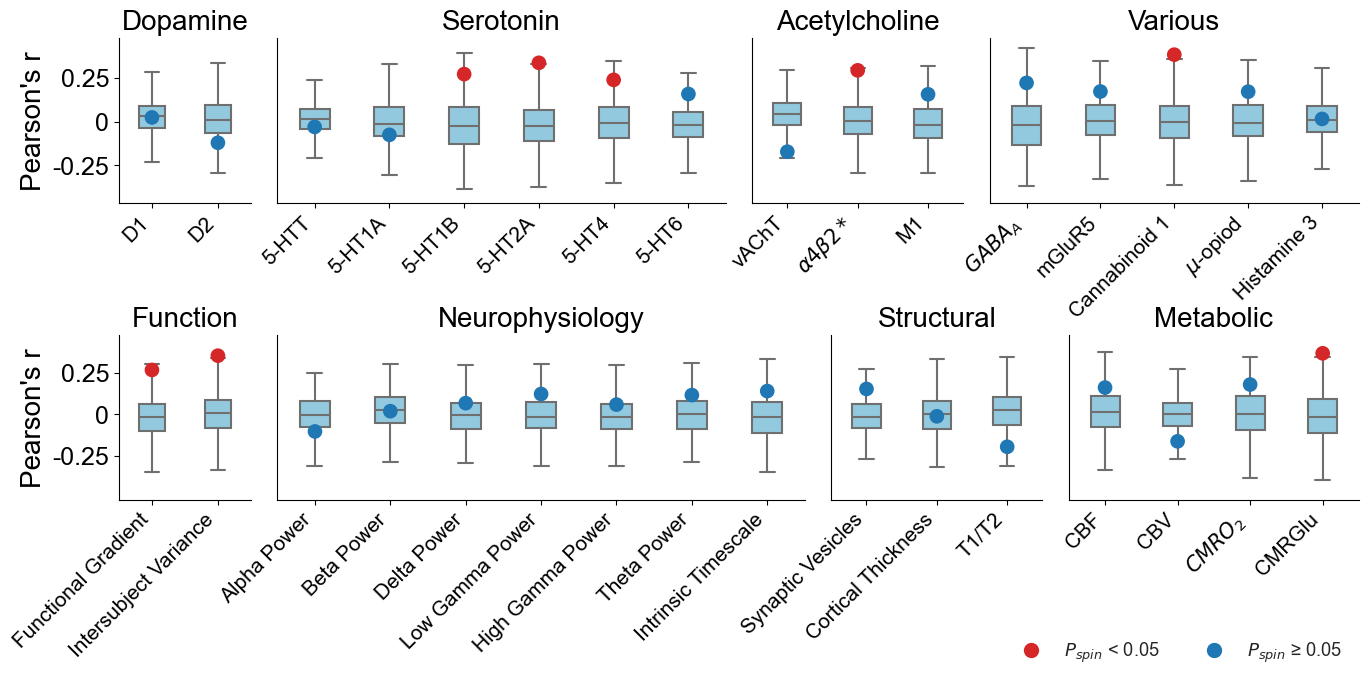

In [12]:
plot_order = ["dopamine", "serotonin", "acetylcholine", "various", "function", "neurophysiology", 
              "structural", "metabolic"]

fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 16, hspace=0.8, wspace=0.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:2])
f_ax2 = fig.add_subplot(gs[0, 2:8], sharey=f_ax1)
f_ax3 = fig.add_subplot(gs[0, 8:11], sharey=f_ax1)
f_ax4 = fig.add_subplot(gs[0, 11:], sharey=f_ax1)
f_ax5 = fig.add_subplot(gs[1, 0:2])
f_ax6 = fig.add_subplot(gs[1, 2:9], sharey=f_ax5)
f_ax7 = fig.add_subplot(gs[1, 9:12], sharey=f_ax5)
f_ax7 = fig.add_subplot(gs[1, 12:], sharey=f_ax5)

sns.set(font_scale=1.2)

for i,ax in enumerate(fig.get_axes()):
    df_nulls = pd.DataFrame(np.column_stack([nulls_turku.get(key) for key in subgroups[plot_order[i]]]))
    df_nulls.columns = subgroups[plot_order[i]]
    df_corrs = pd.DataFrame([corrs_turku.get(key) for key in subgroups[plot_order[i]]])
    xlabel = [change_x_labels[key] for key in df_nulls.columns]
    #xlabel = [colname[1] for colname in [colname.split('_') for colname in df_nulls.columns]]
    df_corrs.columns = ['rho', 'pspin']
    df_corrs['tracers'] = xlabel
    color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
    x = np.arange(df_corrs.shape[0])
    cpalette = dict(zip(x, color))
    sns.set_style("whitegrid")

    ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=df_corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,4]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2)

#plt.savefig(path + 'figures/Figure3_schaefer.jpg', bbox_inches="tight", dpi=300) 